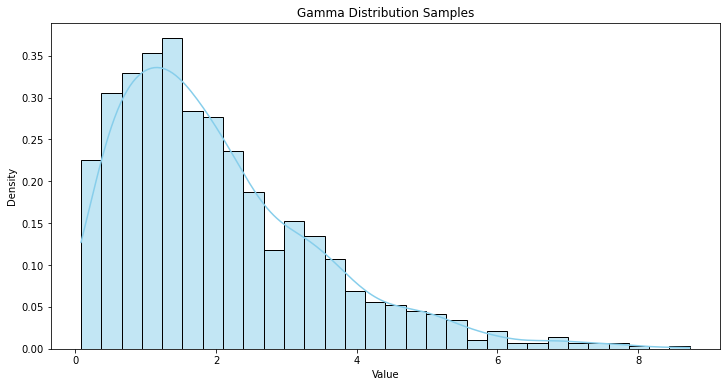

Mean: 2.02, Variance: 2.08


sample: 100%|██████████| 1500/1500 [00:03<00:00, 420.70it/s, 7 steps of size 3.48e-01. acc. prob=0.92] 


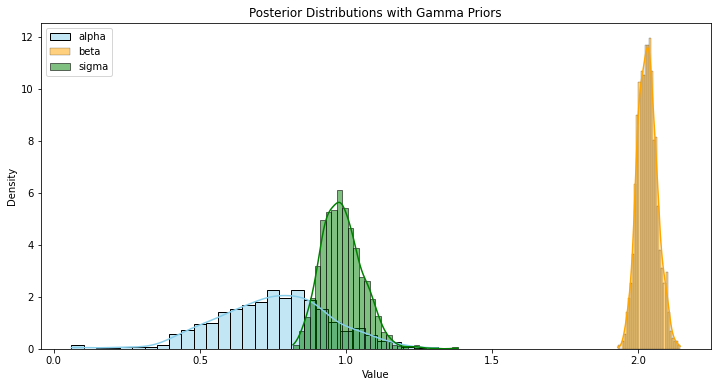

In [8]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
import numpyro
from numpyro.distributions import Gamma, HalfNormal, Normal
from numpyro.infer import MCMC, NUTS

# Task 1: Draw samples from Gamma distribution and plot histogram/KDE
def plot_gamma_samples(alpha, beta, num_samples=1000):
    # Define the Gamma distribution
    gamma_dist = Gamma(alpha, beta)

    # Draw samples
    samples = gamma_dist.sample(jax.random.PRNGKey(0), (num_samples,))

    # Plot histogram and KDE
    plt.figure(figsize=(12, 6))
    sns.histplot(samples, kde=True, stat="density", color="skyblue", bins=30)
    plt.title("Gamma Distribution Samples")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

    # Task 2: Compute mean and variance
    mean = jnp.mean(samples)
    variance = jnp.var(samples)
    print(f"Mean: {mean:.2f}, Variance: {variance:.2f}")

# Task 3: MCMC sampling for linear regression with Gamma priors
def linear_regression_with_gamma_priors(x, y, num_samples=1000):
    def model(x, y):
        # Priors for linear regression
        alpha = numpyro.sample("alpha", Gamma(1.0, 1.0))
        beta = numpyro.sample("beta", Gamma(1.0, 1.0))
        sigma = numpyro.sample("sigma", HalfNormal(1.0))

        # Linear regression model
        mu = alpha + beta * x
        numpyro.sample("y_obs", Normal(mu, sigma), obs=y)

    # NUTS sampler
    nuts_kernel = NUTS(model)

    # MCMC
    mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=num_samples, num_chains=1)
    mcmc.run(jax.random.PRNGKey(0), x=x, y=y)

    # Get posterior samples
    samples = mcmc.get_samples()

    # Plot posterior distributions
    plt.figure(figsize=(12, 6))
    sns.histplot(samples["alpha"], kde=True, stat="density", color="skyblue", bins=30, label="alpha")
    sns.histplot(samples["beta"], kde=True, stat="density", color="orange", bins=30, label="beta")
    sns.histplot(samples["sigma"], kde=True, stat="density", color="green", bins=30, label="sigma")
    plt.title("Posterior Distributions with Gamma Priors")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Example usage for Task 1 and Task 2
plot_gamma_samples(alpha=2.0, beta=1.0)

# Example usage for Task 3
# Generate some synthetic data for linear regression
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, size=len(x))

linear_regression_with_gamma_priors(x, y)